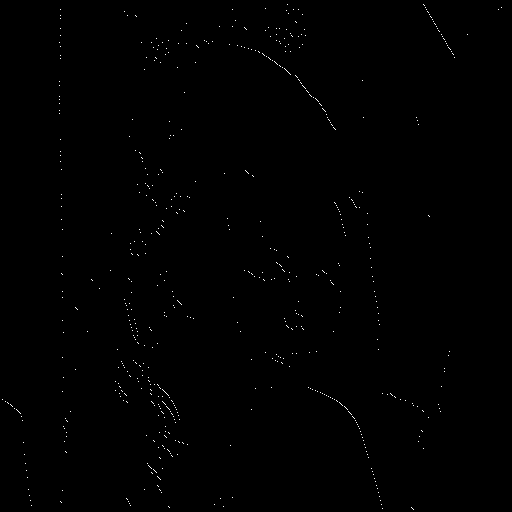

In [10]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

def binary_image(coulmn,row,pix,lena):
    for i in range(coulmn):
        for j in range(row):
            if pix[i,j] < 128:
                lena.putpixel((i,j),0)
            else:
                lena.putpixel((i,j),255)
    #lena.save('binary.bmp')
    return lena
def binary_component(coulmn,row,pix,lena):
    img_new=Image.new(binary.mode, binary.size)
    for i in range(coulmn):
        for j in range(row):
            if pix[i,j] < 128:
                img_new.putpixel((i,j),255)
            else:
                img_new.putpixel((i,j),0)
    return img_new
def dilation(binary,kernal,coulmn,row):
    pix=binary.load()
    img_new=Image.new(binary.mode, binary.size)
    for i in range(coulmn):
        for j in range(row):
            if pix[i,j] == 255:
                for x in range(-2,3,1):
                    for y in range(-2,3,1):
                        if kernal[x+2][y+2] == 1:
                            if (i+x >=0) and (j+y >= 0) and (i+x < coulmn) and (j+y < row):
                                img_new.putpixel((i+x,j+y),255)
    #img_new.save('dilation.bmp')
    return img_new
def erosion(binary,kernal,coulmn,row):
    pix=binary.load()
    img_new=Image.new(binary.mode, binary.size)
    for i in range(coulmn):
        for j in range(row):
            draw=1
            for x in range(-2,3,1):
                for y in range(-2,3,1):
                    if kernal[x+2][y+2] == 1:
                        if (i+x < coulmn) and (j+y < row) and (i+x >= 0) and (j+y >= 0):
                            if pix[i+x,j+y]==0:
                                draw=0
                        else:
                            draw=0
            if draw == 1:
                img_new.putpixel((i,j),255)
    #img_new.save('erosion.bmp')
    return img_new
def opening(binary,kernal,coulmn,row):
    p=erosion(binary,kernal,coulmn,row)
    op=dilation(p,kernal,coulmn,row)
    #op.save('opening.bmp')
    return op
def closing(binary,kernal,coulmn,row):
    p=dilation(binary,kernal,coulmn,row)
    close=erosion(p,kernal,coulmn,row)
    #close.save('closing.bmp')
    return close

def hit_miss(binary,kernal_j,kernal_k,coulmn,row):
    pix=binary.load()
    component=binary_component(coulmn,row,pix,binary)
    J=erosion(binary,kernal_k,coulmn,row)
    K=erosion(component,kernal_j,coulmn,row)
    img_new=Image.new(binary.mode, binary.size)
    J_pixel=J.load()
    K_pixel=K.load()
    for i in range(coulmn):
        for j in range(row):
            if J_pixel[i,j]==255 and K_pixel[i,j]==255:
                img_new.putpixel((i,j),255)
    #img_new.save('hit_miss.bmp')
    return img_new

lena= Image.open("lena.bmp")
pix=lena.load()
coulmn,row=lena.size
binary=binary_image(coulmn,row,pix,lena)
kernal_array=np.array([[0,1,1,1,0],
                       [1,1,1,1,1],
                       [1,1,1,1,1],
                       [1,1,1,1,1],
                       [0,1,1,1,0]])

kernal_j=np.array([[0,0,0,0,0],
                   [0,0,0,0,0],
                   [0,1,1,0,0],
                   [0,0,1,0,0],
                   [0,0,0,0,0]])

kernal_k=np.array([[0,0,0,0,0],
                   [0,0,1,1,0],
                   [0,0,0,1,0],
                   [0,0,0,0,0],
                   [0,0,0,0,0]]
                 )
#dilation(binary,kernal_array,coulmn,row)
#erosion(binary,kernal_array,coulmn,row)
#closing(binary,kernal_array,coulmn,row)
#opening(binary,kernal_array,coulmn,row)
#hit_miss(binary,kernal_j,kernal_k,coulmn,row)